In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/audiology.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '100M')

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['history_noise','class'],['history_fluctuating','class']]
tempForbid = p.ForbiddenWithin(
    ['class','history_fluctuating','history_noise'])
temporal = [tempForbid]
prior = p.knowledge(forbiddirect = forbid, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  class history_fluctuating history_noise

forbiddirect

requiredirect

#### Load causal algorithms from the py-causal library and Run FGES Discrete

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listScores()

bdeu-score
cci-score
cg-bic-score
cg-other-bic-score
d-sep-score
disc-bic-score
disc-mixed-bic-score
mnlr-bic-score
mvp-bic-score
sem-bic-score


In [6]:
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'bdeu-score')

faithfulnessAssumed: This is a parameter for FGES (“Fast GES”). If this is set to ‘Yes’, it will be assumed that if X _||_ Y, by an independence test, then X _||_ Y | Z for nonempty Z. If the model is faithful to the data, this will necessarily be the case. However, there are some non-faithful examples one can propose where this is not the case. If one is worried about this kind of unfaithfulness, one should set this parameter to ‘No’. If one is willing to tolerate this kind of unfaithfulness, then setting this parameter to ‘Yes’ leads to significantly faster searches. (java.lang.Boolean) [default:true]
symmetricFirstStep: For discrete searches, and in some other situations, it may make a difference for an edge X—Y whether you score X->Y or X<-Y, even though theoretically they should have the same score. If this parameter is set to “Yes”, both scores will be calculated and the higher score used. (Recall we are calculating BIC as 2L – c k ln N, where c is the penalty discount.) (java.la

In [7]:
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'bdeu-score', 
           priorKnowledge = prior, dataType = 'discrete',
           maxDegree = 3, faithfulnessAssumed = True, 
           symmetricFirstStep = True, verbose = True)

#### FGES Discrete's Result's Nodes

In [8]:
tetrad.getNodes()

['age_gt_60',
 'air',
 'airBoneGap',
 'ar_c',
 'ar_u',
 'bone',
 'boneAbnormal',
 'bser',
 'history_buzzing',
 'history_dizziness',
 'history_fluctuating',
 'history_fullness',
 'history_heredity',
 'history_nausea',
 'history_noise',
 'history_recruitment',
 'history_ringing',
 'history_roaring',
 'history_vomiting',
 'late_wave_poor',
 'm_at_2k',
 'm_cond_lt_1k',
 'm_gt_1k',
 'm_m_gt_2k',
 'm_m_sn',
 'm_m_sn_gt_1k',
 'm_m_sn_gt_2k',
 'm_m_sn_gt_500',
 'm_p_sn_gt_2k',
 'm_s_gt_500',
 'm_s_sn',
 'm_s_sn_gt_1k',
 'm_s_sn_gt_2k',
 'm_s_sn_gt_3k',
 'm_s_sn_gt_4k',
 'm_sn_2_3k',
 'm_sn_gt_1k',
 'm_sn_gt_2k',
 'm_sn_gt_3k',
 'm_sn_gt_4k',
 'm_sn_gt_500',
 'm_sn_gt_6k',
 'm_sn_lt_1k',
 'm_sn_lt_2k',
 'm_sn_lt_3k',
 'middle_wave_poor',
 'mod_gt_4k',
 'mod_mixed',
 'mod_s_mixed',
 'mod_s_sn_gt_500',
 'mod_sn',
 'mod_sn_gt_1k',
 'mod_sn_gt_2k',
 'mod_sn_gt_3k',
 'mod_sn_gt_4k',
 'mod_sn_gt_500',
 'notch_4k',
 'notch_at_4k',
 'o_ar_c',
 'o_ar_u',
 's_sn_gt_1k',
 's_sn_gt_2k',
 's_sn_gt_4k',
 'sp

#### FGES Discrete's Result's Nodes

In [9]:
tetrad.getEdges()

['m_s_gt_500 --> m_sn_lt_3k',
 'bser --> history_nausea',
 'm_s_sn --> mod_sn_gt_1k',
 'waveform_ItoV_prolonged --> history_roaring',
 'notch_4k --> history_noise',
 'o_ar_c --> ar_c',
 'm_s_sn_gt_4k --> mod_sn_gt_4k',
 'history_fullness --> m_s_gt_500',
 'm_sn_lt_2k --> m_m_sn_gt_500',
 'mod_gt_4k --> mod_sn_gt_2k',
 'history_ringing --> tymp',
 'm_s_gt_500 --> mod_gt_4k',
 'bser --- middle_wave_poor',
 'airBoneGap --> tymp',
 'middle_wave_poor --> m_sn_gt_1k',
 'ar_u --> o_ar_u',
 'm_sn_lt_3k --> m_m_sn_gt_2k',
 'mod_s_sn_gt_500 --> s_sn_gt_1k',
 'wave_V_delayed --> notch_at_4k',
 'history_recruitment --> m_sn_gt_1k',
 'ar_c --> o_ar_u',
 'mod_sn_gt_1k --> wave_V_delayed',
 'history_buzzing --> wave_V_delayed',
 'history_nausea --> history_dizziness',
 'm_gt_1k --> history_ringing',
 'm_s_sn --> mod_s_sn_gt_500',
 'm_gt_1k --> m_s_sn_gt_3k',
 'late_wave_poor --- bser',
 'm_sn_2_3k --> m_sn_gt_3k',
 'm_at_2k --> m_s_sn_gt_2k',
 'm_at_2k --> m_s_sn',
 'viith_nerve_signs --> mod_s_sn_gt

In [10]:
graph = tetrad.getTetradGraph()
print('Graph BIC: {}'.format(graph.getAttribute('BIC')))
nodes = graph.getNodes()
for i in range(nodes.size()):
    node = nodes.get(i)
    print('Node {} BIC: {}'.format(node.getName(),node.getAttribute('BIC')))

Graph BIC: -5399.162336304958
Node age_gt_60 BIC: -137.61319725605466
Node air BIC: -233.5212251562117
Node airBoneGap BIC: -81.44451137153203
Node ar_c BIC: -217.0778224631994
Node ar_u BIC: -213.36321486613647
Node bone BIC: -289.3238806309556
Node boneAbnormal BIC: -118.74347964059335
Node bser BIC: -48.939817441174974
Node history_buzzing BIC: -28.854379744009094
Node history_dizziness BIC: -75.823856142213
Node history_fluctuating BIC: -46.41990468860264
Node history_fullness BIC: -28.854379744009094
Node history_heredity BIC: -32.03975961444908
Node history_nausea BIC: -58.85014875286363
Node history_noise BIC: -120.7223696801518
Node history_recruitment BIC: -32.03975961444908
Node history_ringing BIC: -38.07332653904477
Node history_roaring BIC: -51.5915193517081
Node history_vomiting BIC: -43.72178012730036
Node late_wave_poor BIC: -32.03975961444908
Node m_at_2k BIC: -28.854379744009094
Node m_cond_lt_1k BIC: -3.0661835860875044
Node m_gt_1k BIC: -28.854379744009094
Node m_m_

#### Plot The Result's Graph

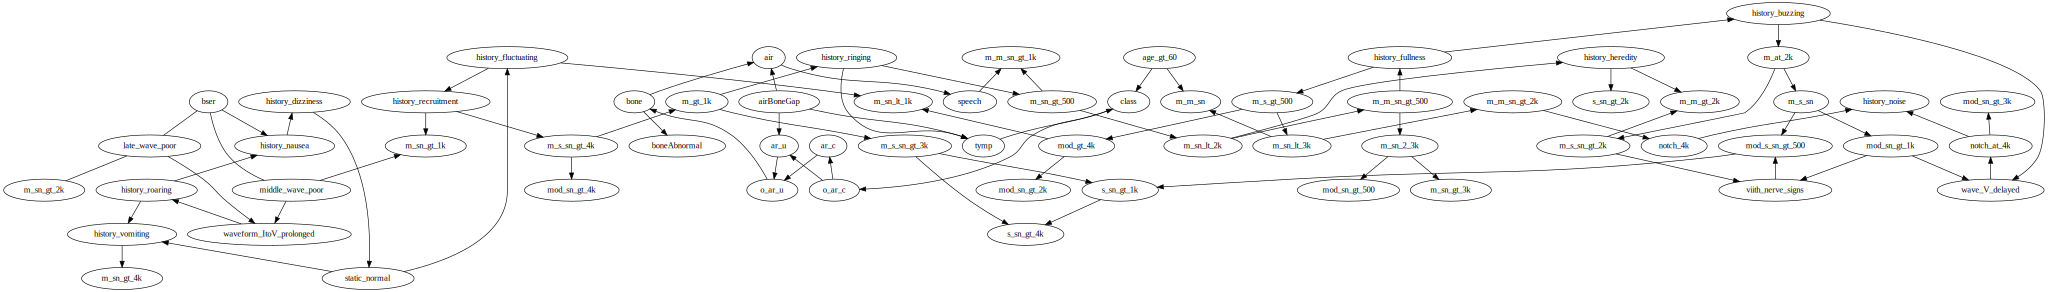

In [11]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(graph)
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [12]:
pc.stop_vm()